In [119]:
# Dataset: https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset?select=HR_Analytics.csv
# Name: HR analytics
# Algorithm Use: Random Forest

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [121]:
df = pd.read_csv('HR_Analytics.csv')

In [122]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [123]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [124]:
# Dropping irrelevent columns
df.drop(['EmpID', 'AgeGroup', 'DailyRate', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'SalarySlab', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [125]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1480 non-null   int64  
 1   Attrition                 1480 non-null   object 
 2   BusinessTravel            1480 non-null   object 
 3   Department                1480 non-null   object 
 4   DistanceFromHome          1480 non-null   int64  
 5   Education                 1480 non-null   int64  
 6   EducationField            1480 non-null   object 
 7   EnvironmentSatisfaction   1480 non-null   int64  
 8   Gender                    1480 non-null   object 
 9   JobInvolvement            1480 non-null   int64  
 10  JobLevel                  1480 non-null   int64  
 11  JobRole                   1480 non-null   object 
 12  JobSatisfaction           1480 non-null   int64  
 13  MaritalStatus             1480 non-null   object 
 14  MonthlyI

In [127]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0
JobInvolvement,0


In [128]:
# Convert Attrition to numerical
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [129]:
df['YearsWithCurrManager'].value_counts()

,count
YearsWithCurrManager,
2.0,330
0.0,253
7.0,211
3.0,139
8.0,100
4.0,95
1.0,76
9.0,61
5.0,31


In [130]:
# 57 employess might be not assigned to any manager that's why set to 0
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].fillna(0)

EDA

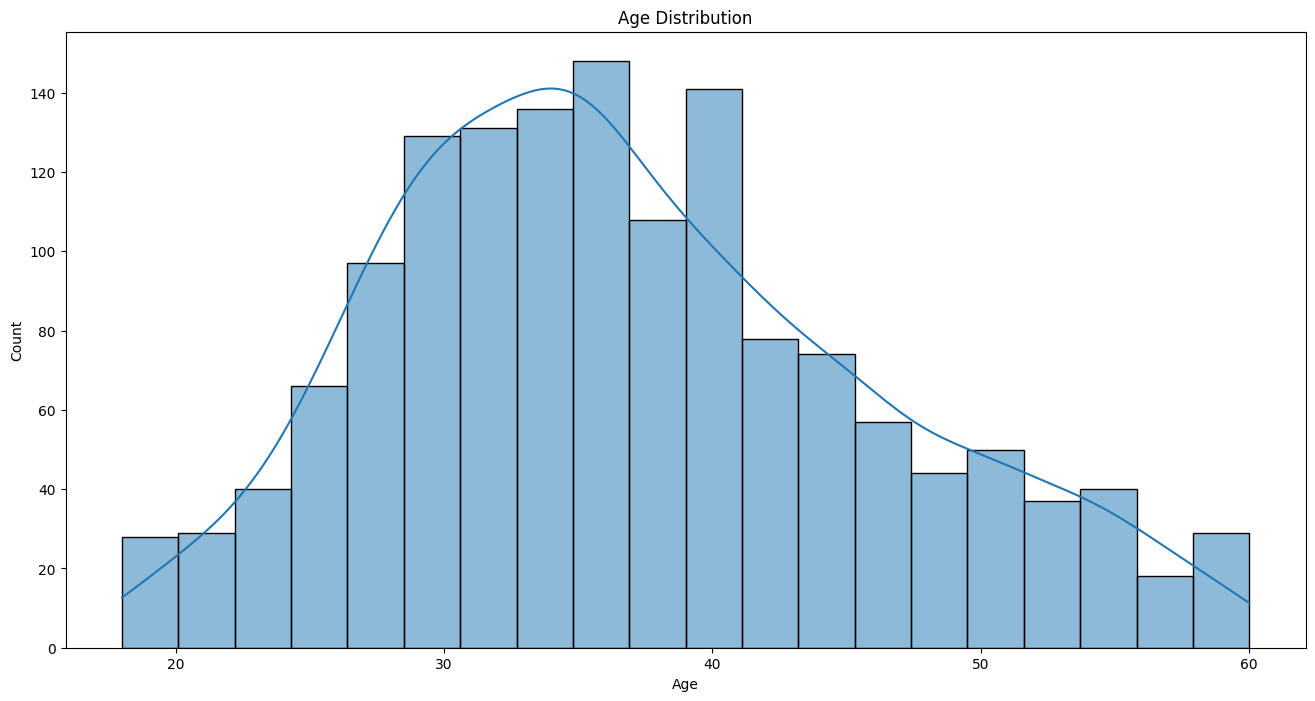

In [131]:
# age distribution
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

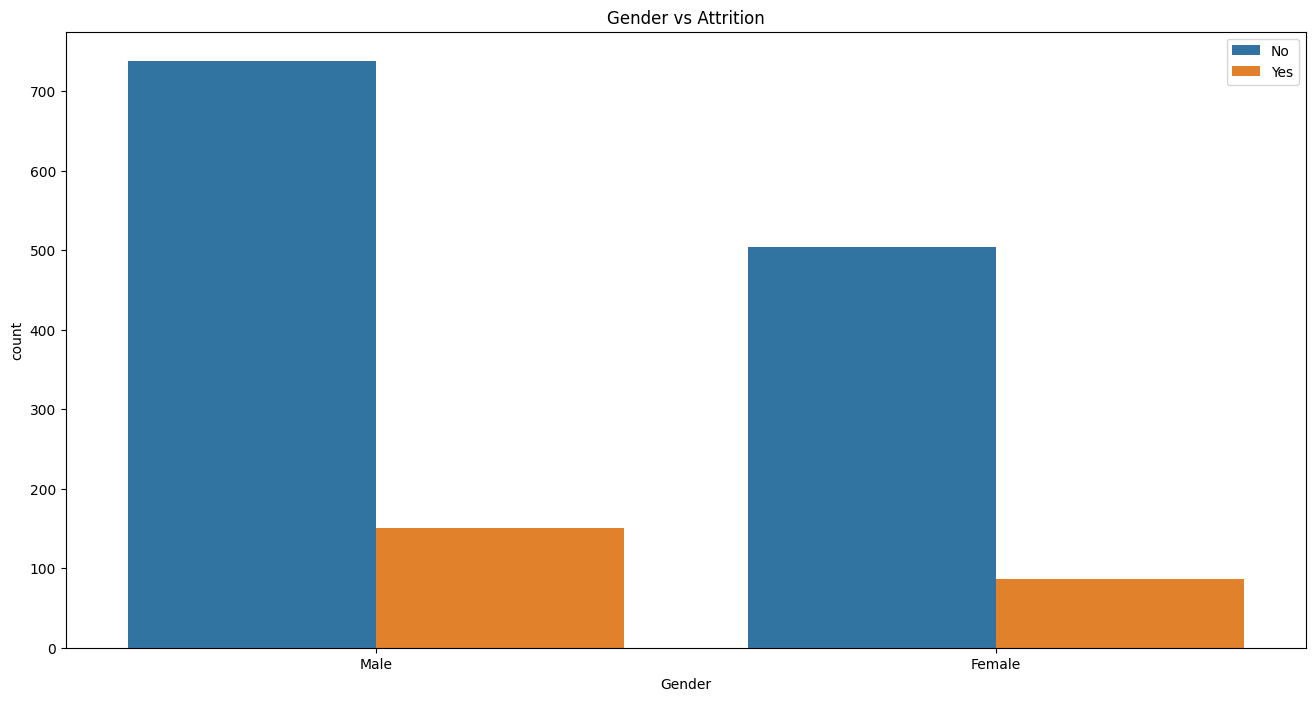

In [132]:
# check gender wise who want to leave
sns.countplot(x='Gender', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Gender vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.show()

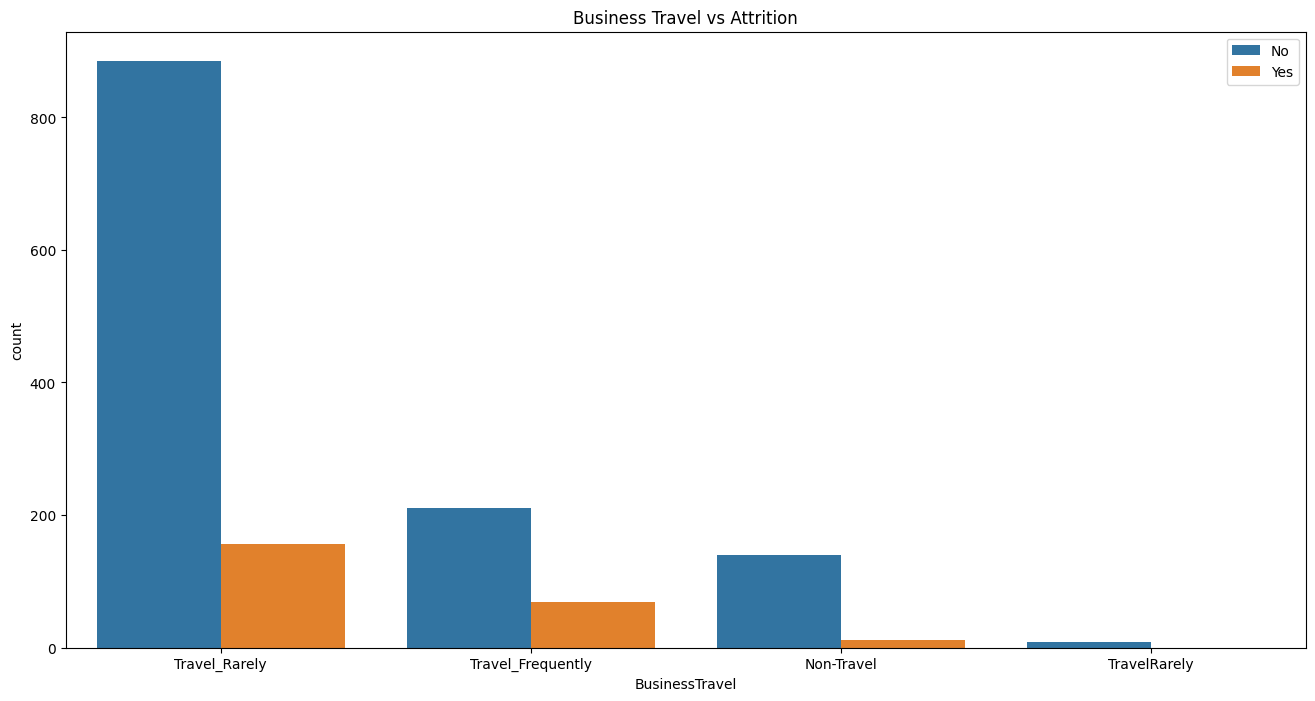

In [133]:
# business travel plot with Attrition
sns.countplot(x='BusinessTravel', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Business Travel vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.show()

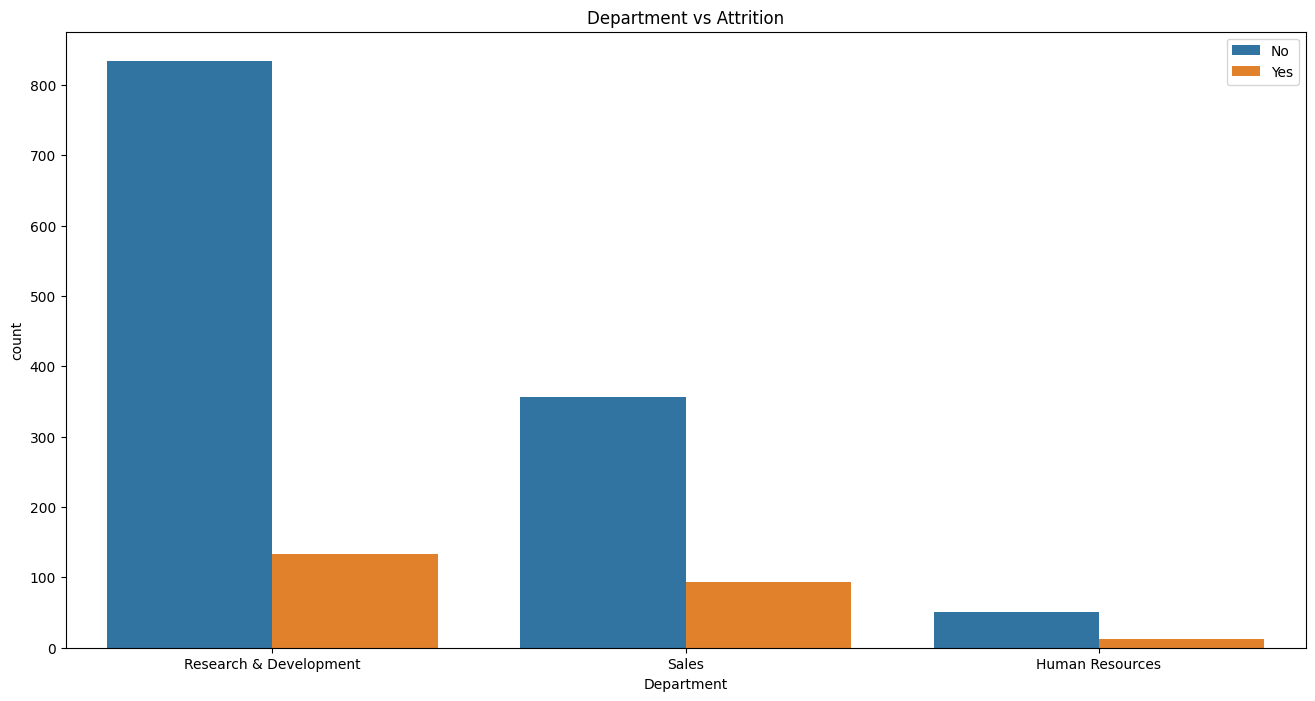

In [134]:
# plot for department with Attrition
sns.countplot(x='Department', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Department vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.show()

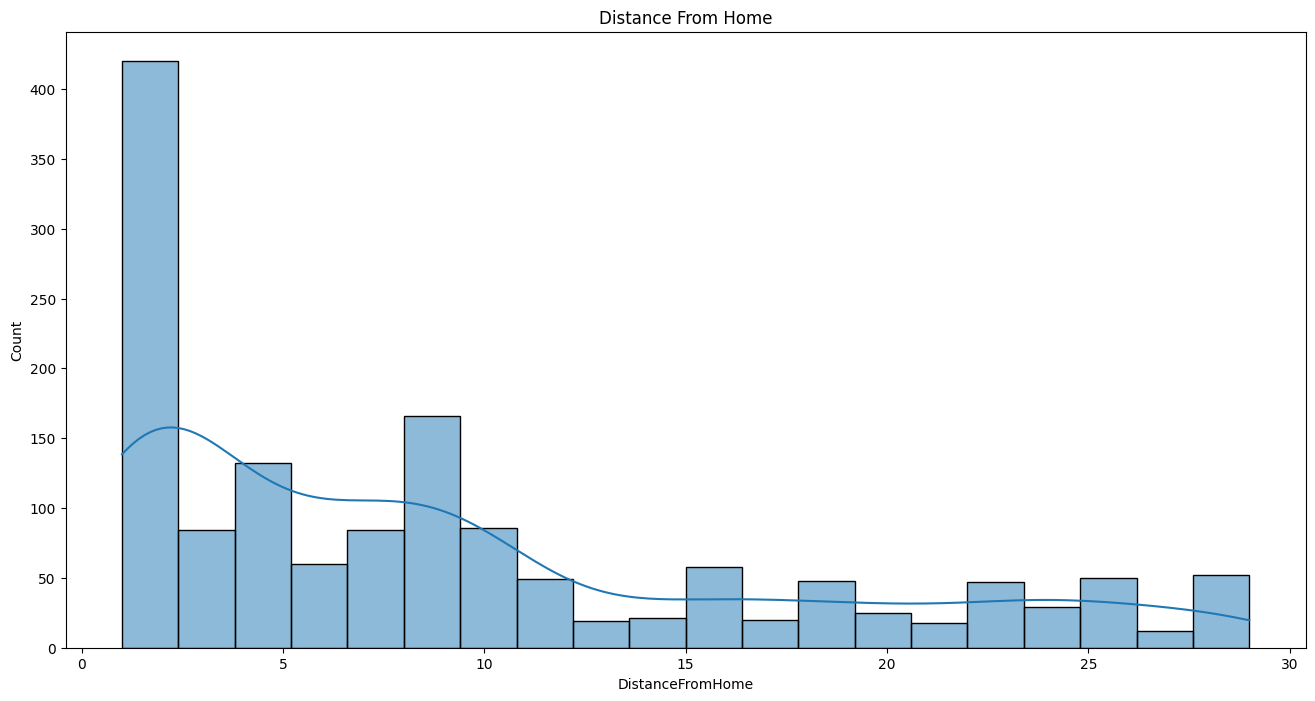

In [135]:
# distance from home
sns.histplot(df['DistanceFromHome'], kde=True, bins=20)
plt.title('Distance From Home')
plt.show()

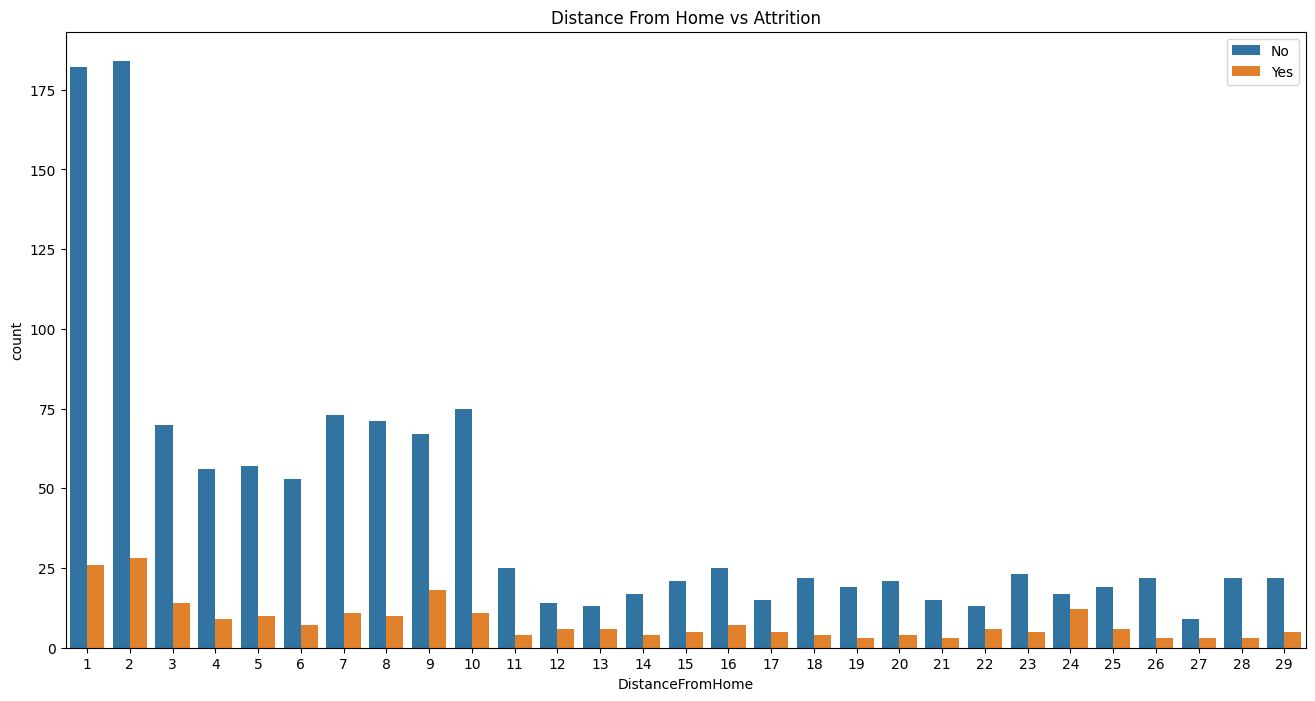

In [136]:
# plot with distancefrome home vs attrition
sns.countplot(x='DistanceFromHome', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Distance From Home vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.show()

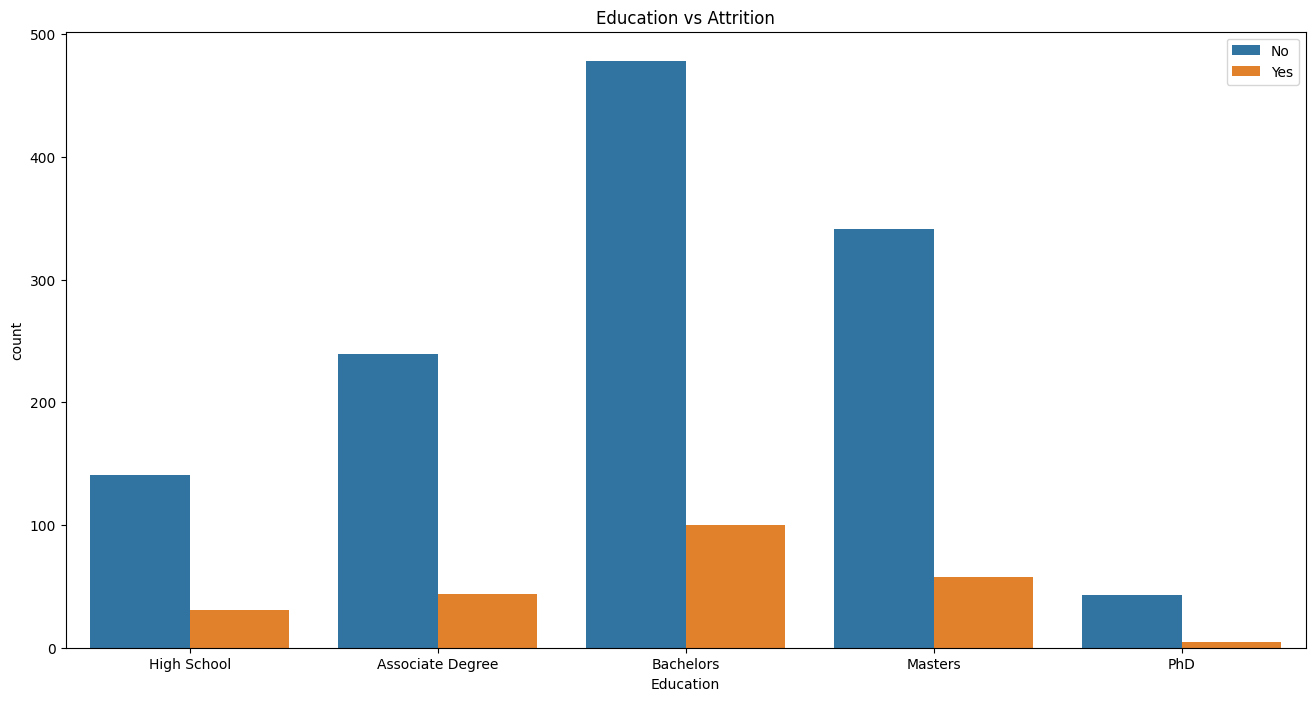

In [137]:
# plot for education with Attrition
sns.countplot(x='Education', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Education vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['High School', 'Associate Degree', 'Bachelors', 'Masters', 'PhD'])
plt.show()

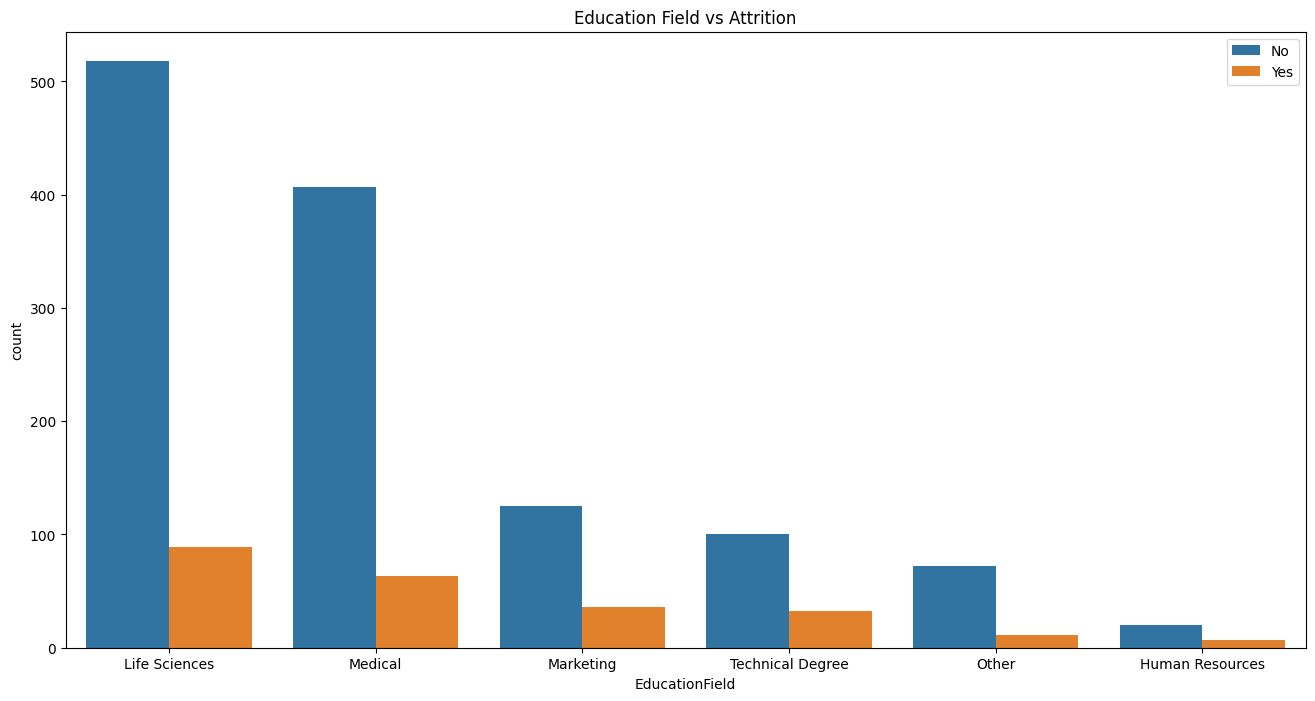

In [138]:
# plot for education field with Attrition
sns.countplot(x='EducationField', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Education Field vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.show()

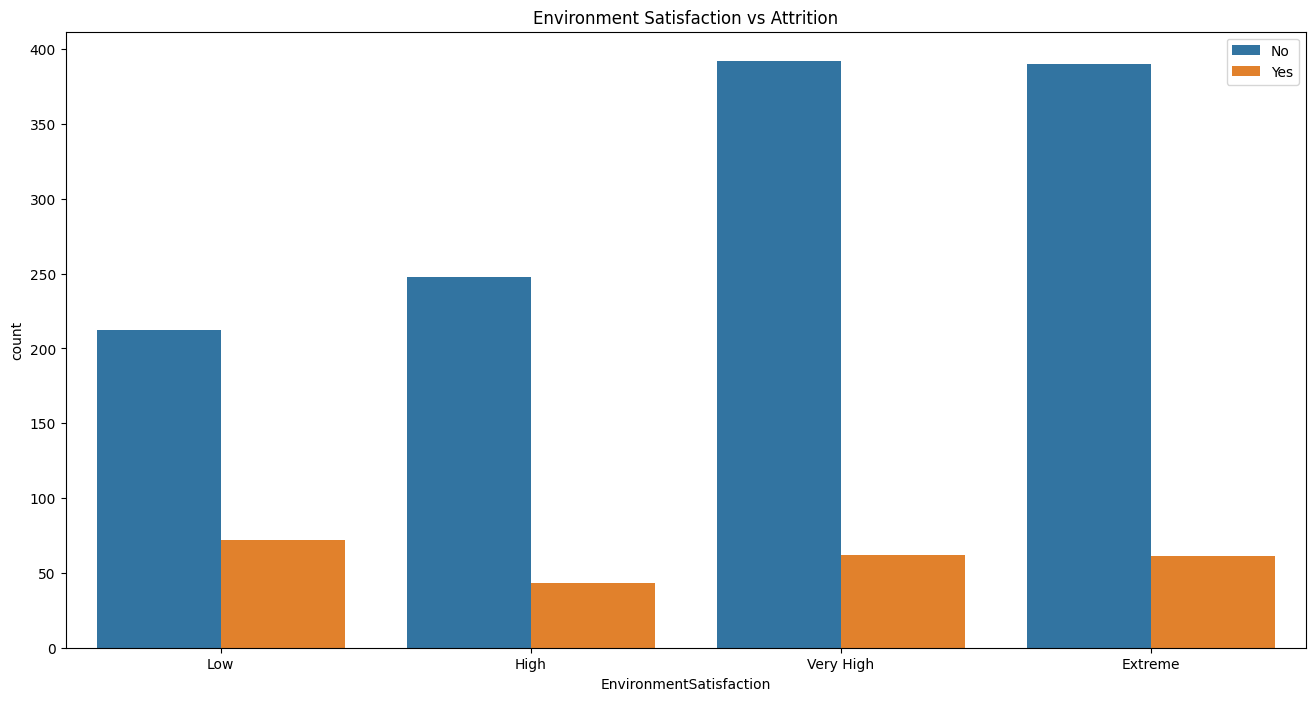

In [139]:
# plot for EnvironmentSatisfaction with Attrition
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Environment Satisfaction vs Attrition')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low', 'High', 'Very High', 'Extreme'])
plt.legend(labels=['No', 'Yes'])
plt.show()

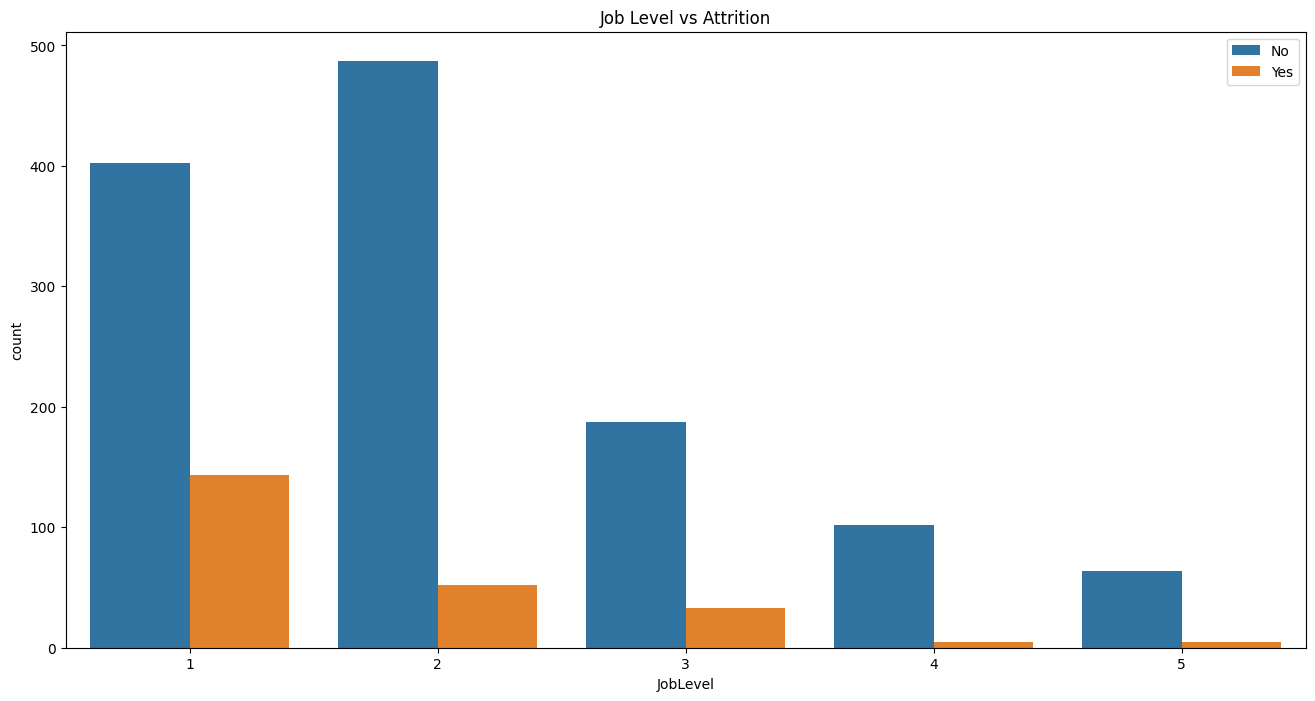

In [140]:
# plot for JobLevel with Attrition
sns.countplot(x='JobLevel', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Job Level vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.show()

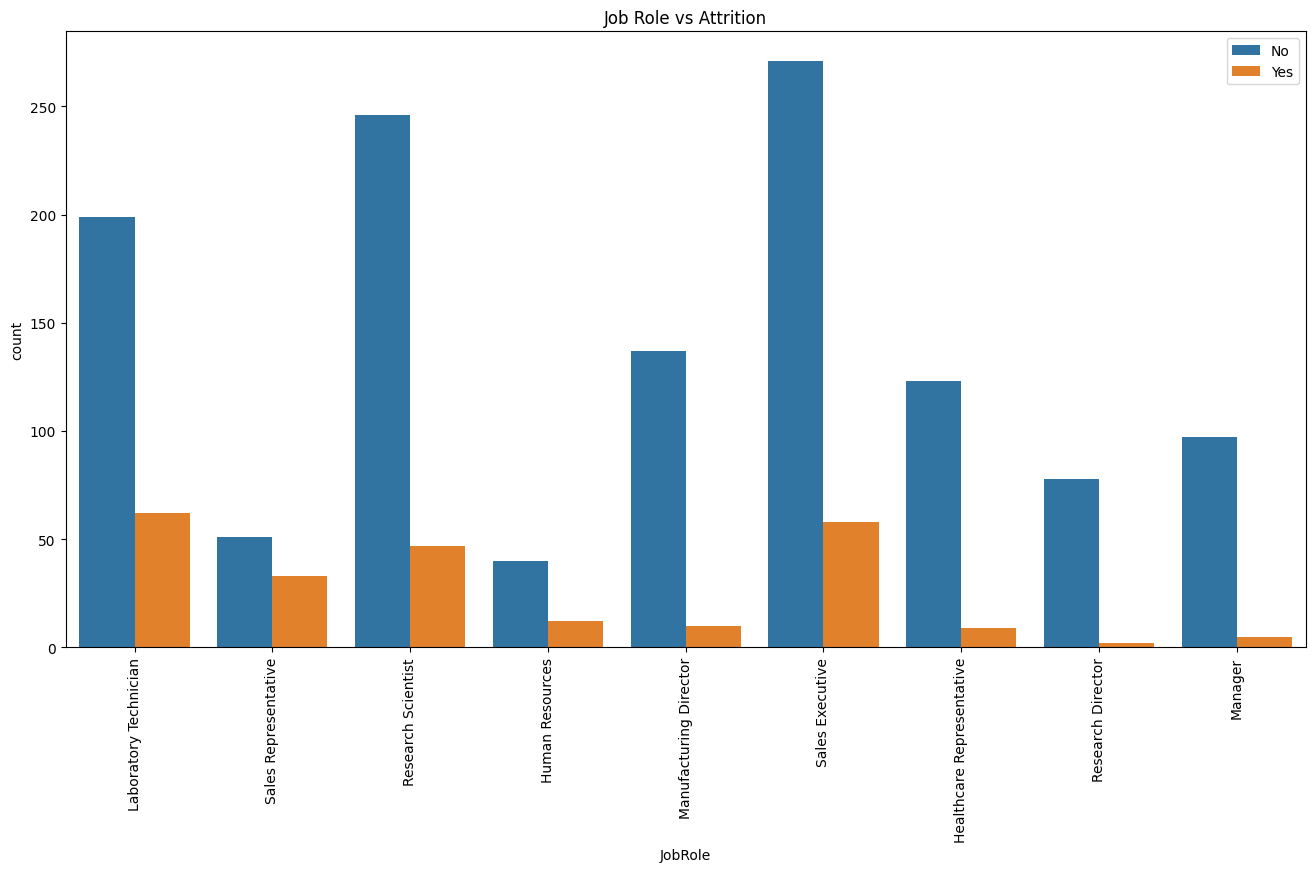

In [141]:
# plot for JobRole with Attrition
sns.countplot(x='JobRole', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Job Role vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.xticks(rotation=90)
plt.show()

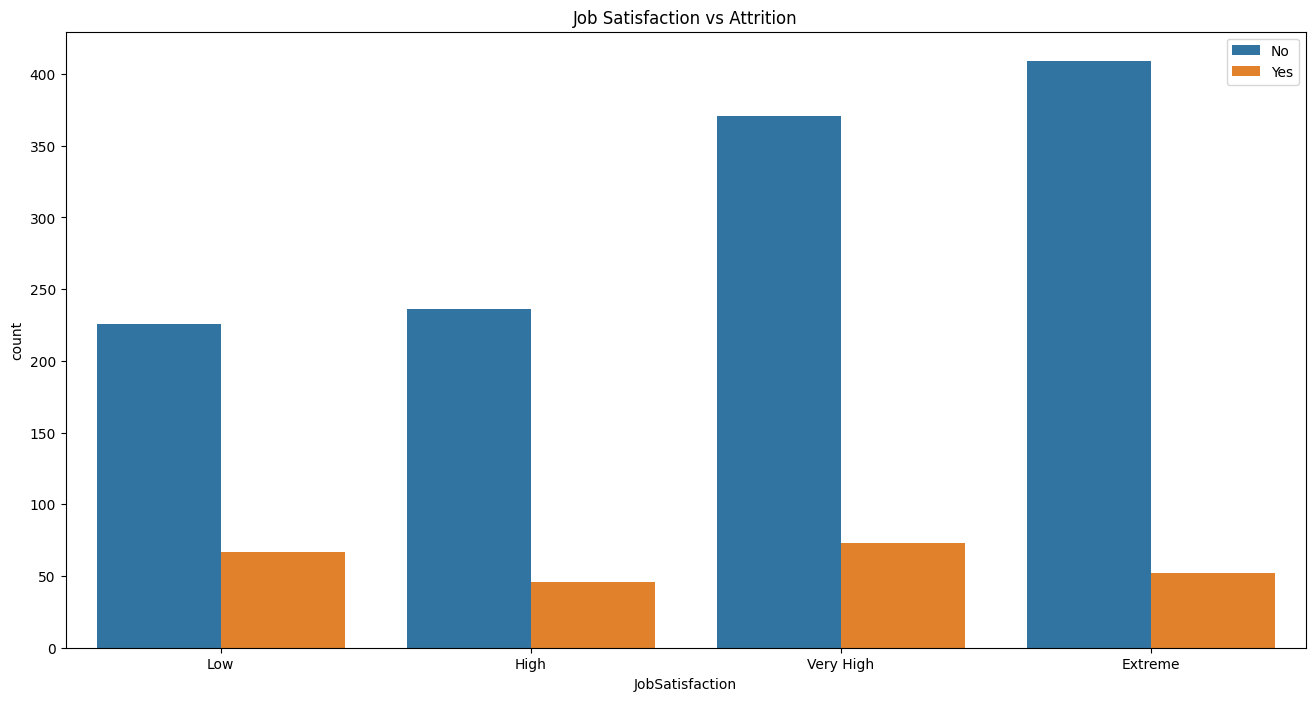

In [142]:
# plot for job satisfaction with Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Job Satisfaction vs Attrition')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low', 'High', 'Very High', 'Extreme'])
plt.legend(labels=['No', 'Yes'])
plt.show()

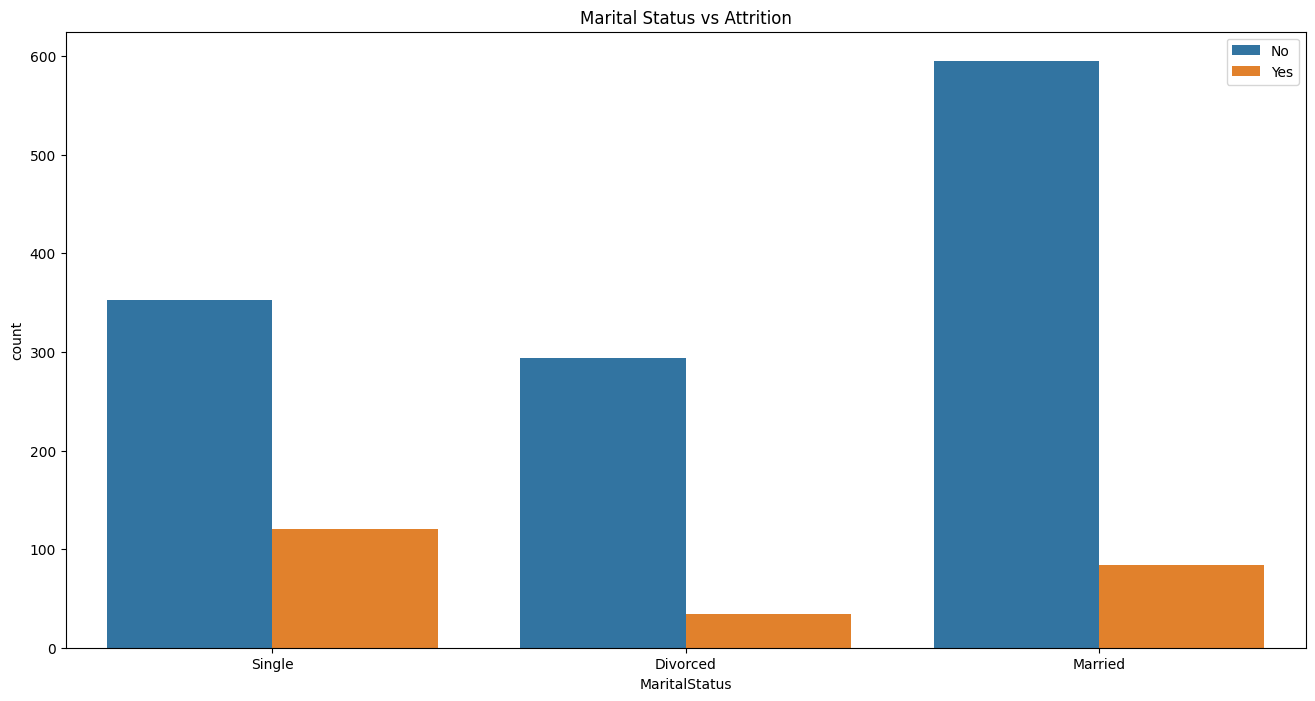

In [143]:
# plot for MaritalStatus with Attrition
sns.countplot(x='MaritalStatus', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Marital Status vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.show()

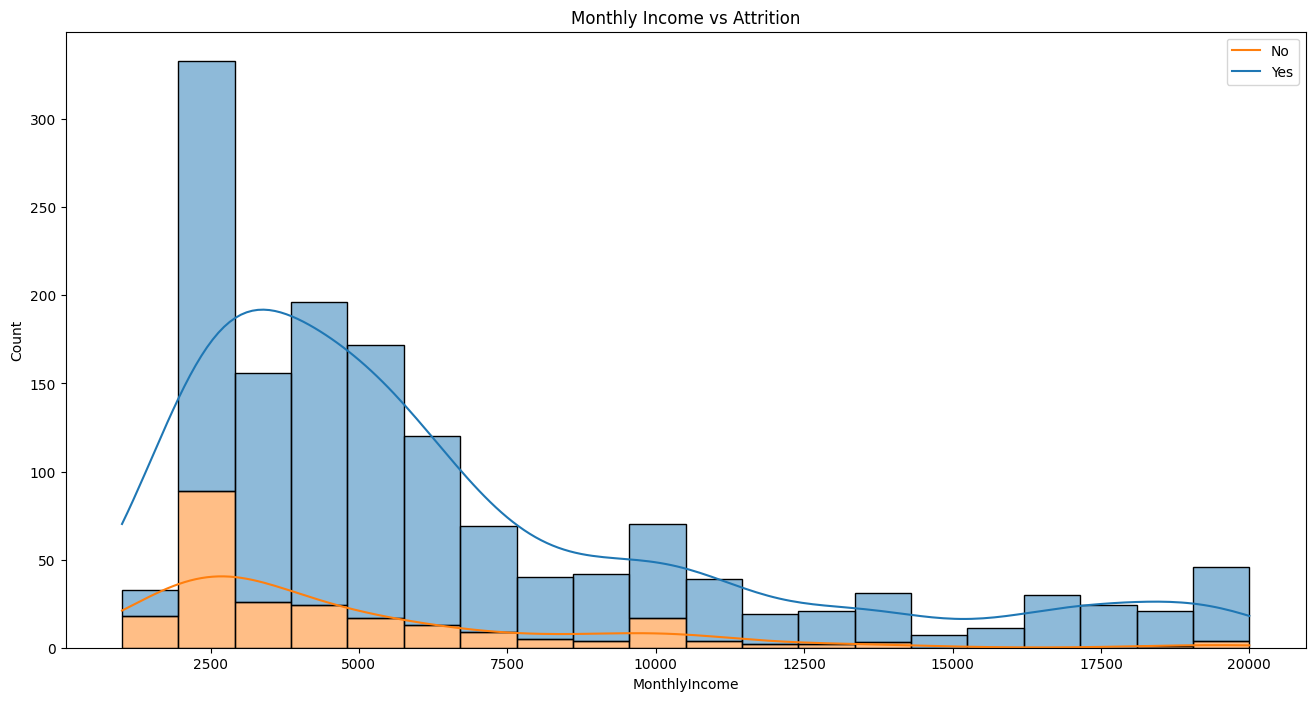

In [144]:
# plot for MonthlyIncome with Attrition
sns.histplot(df, x='MonthlyIncome', hue='Attrition', kde=True, bins=20, multiple='stack', hue_order=[0, 1])
plt.title('Monthly Income vs Attrition')
plt.legend(labels=['No', 'Yes'])
plt.show()

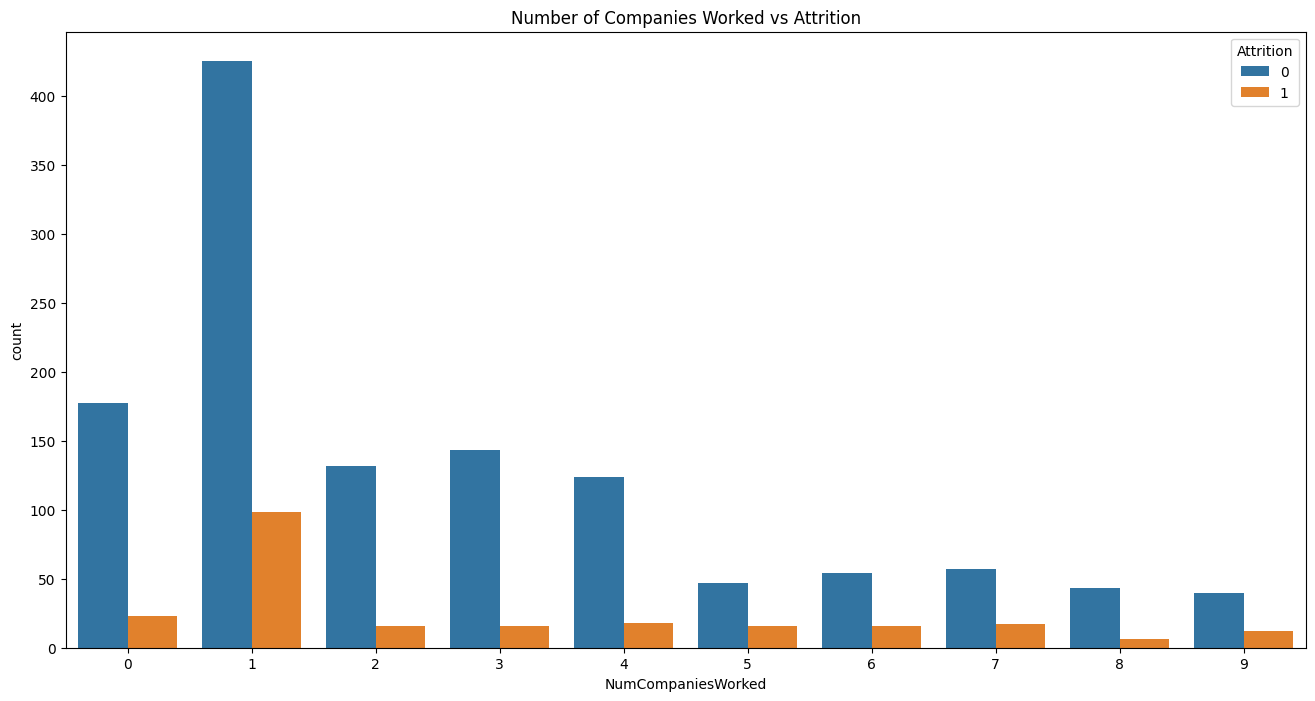

In [145]:
# plot for NumCompaniesWorked with Attrition
sns.countplot(x='NumCompaniesWorked', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Number of Companies Worked vs Attrition')
plt.show()

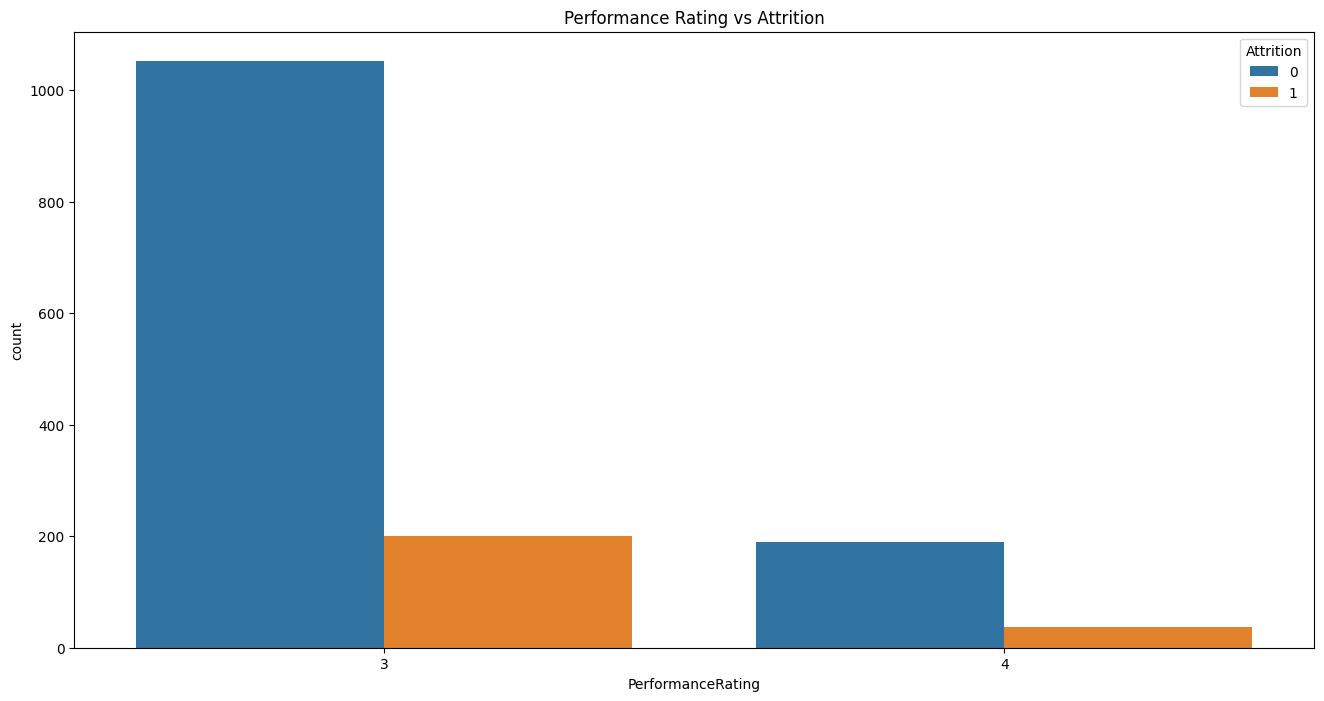

In [146]:
# plot for PerformanceRating with Attrition
sns.countplot(x='PerformanceRating', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Performance Rating vs Attrition')
plt.show()

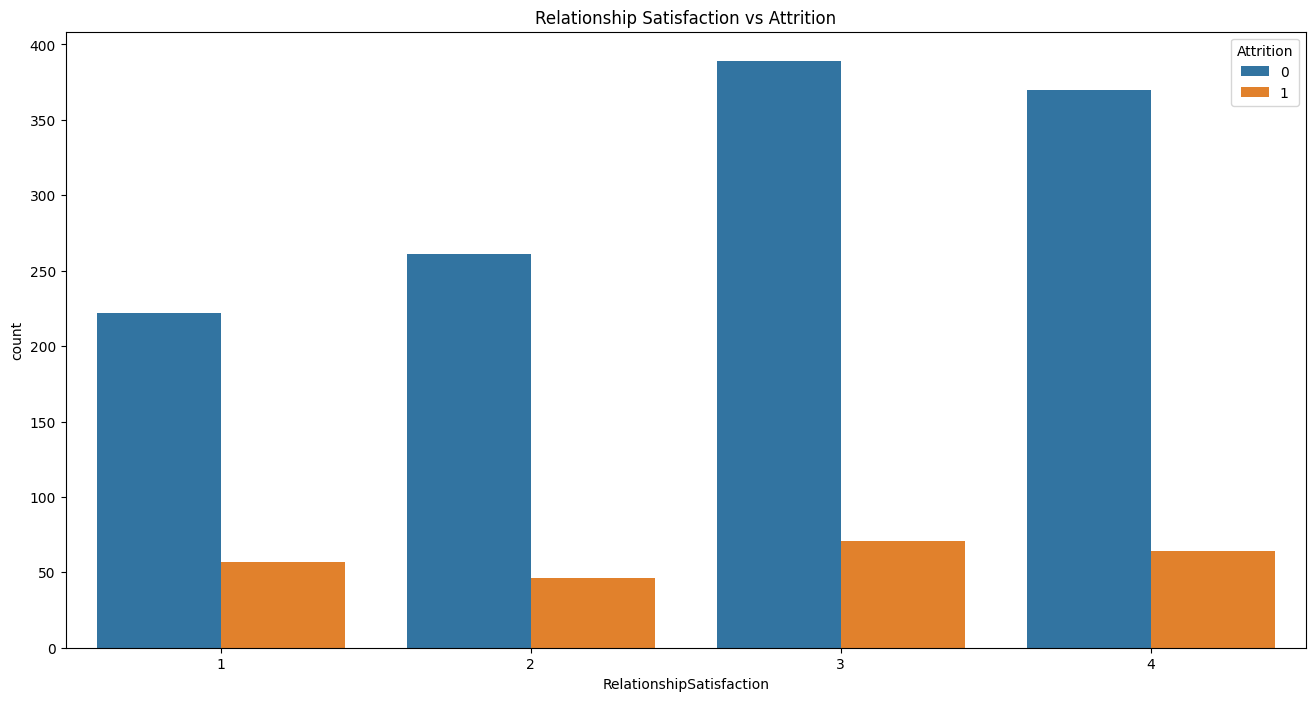

In [147]:
# plot for RelationshipSatisfaction with Attrition
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Relationship Satisfaction vs Attrition')
plt.show()

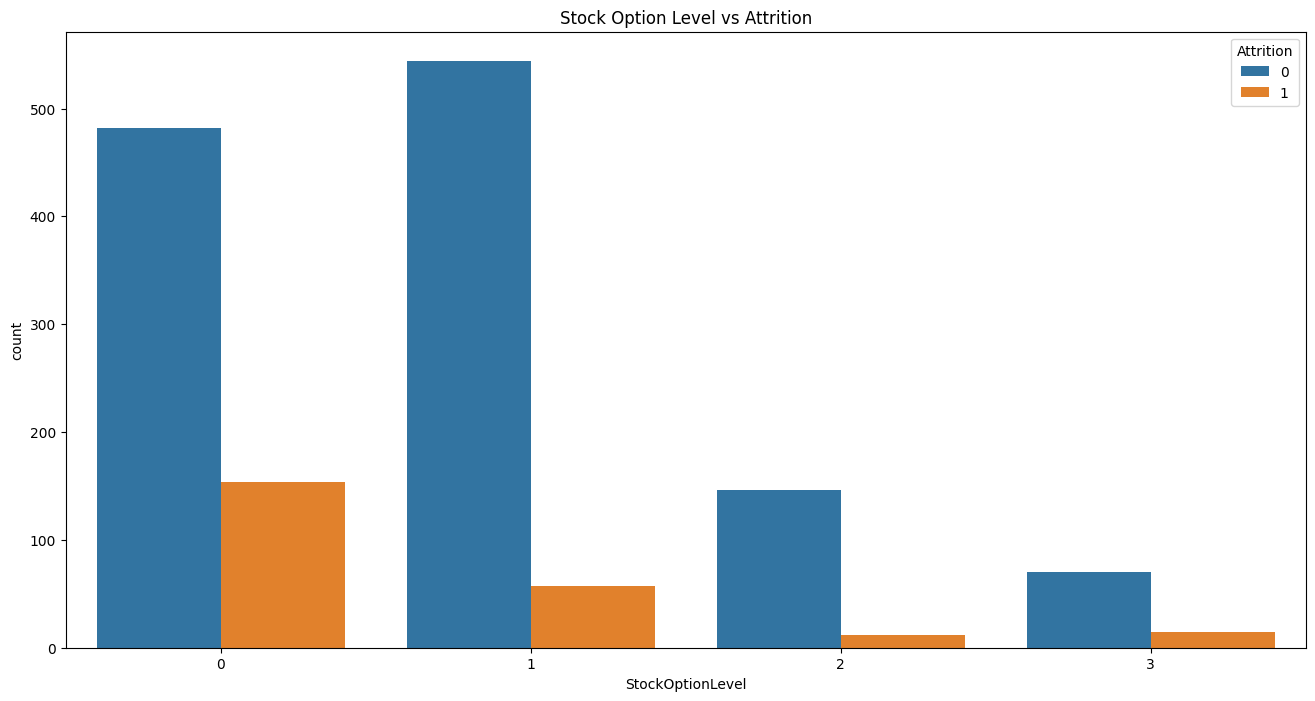

In [148]:
# plot for StockOptionLevel with Attrition
sns.countplot(x='StockOptionLevel', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Stock Option Level vs Attrition')
plt.show()

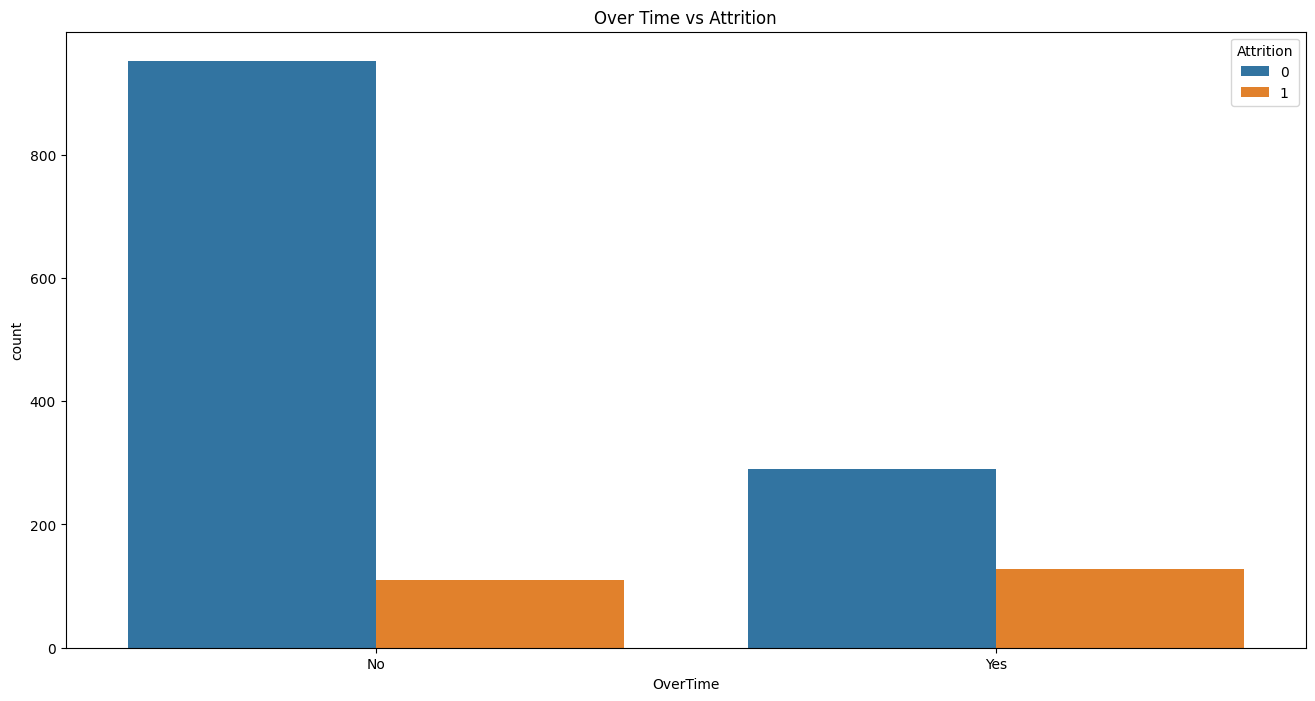

In [149]:
# plot for OverTime with Attrition
sns.countplot(x='OverTime', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Over Time vs Attrition')
plt.show()

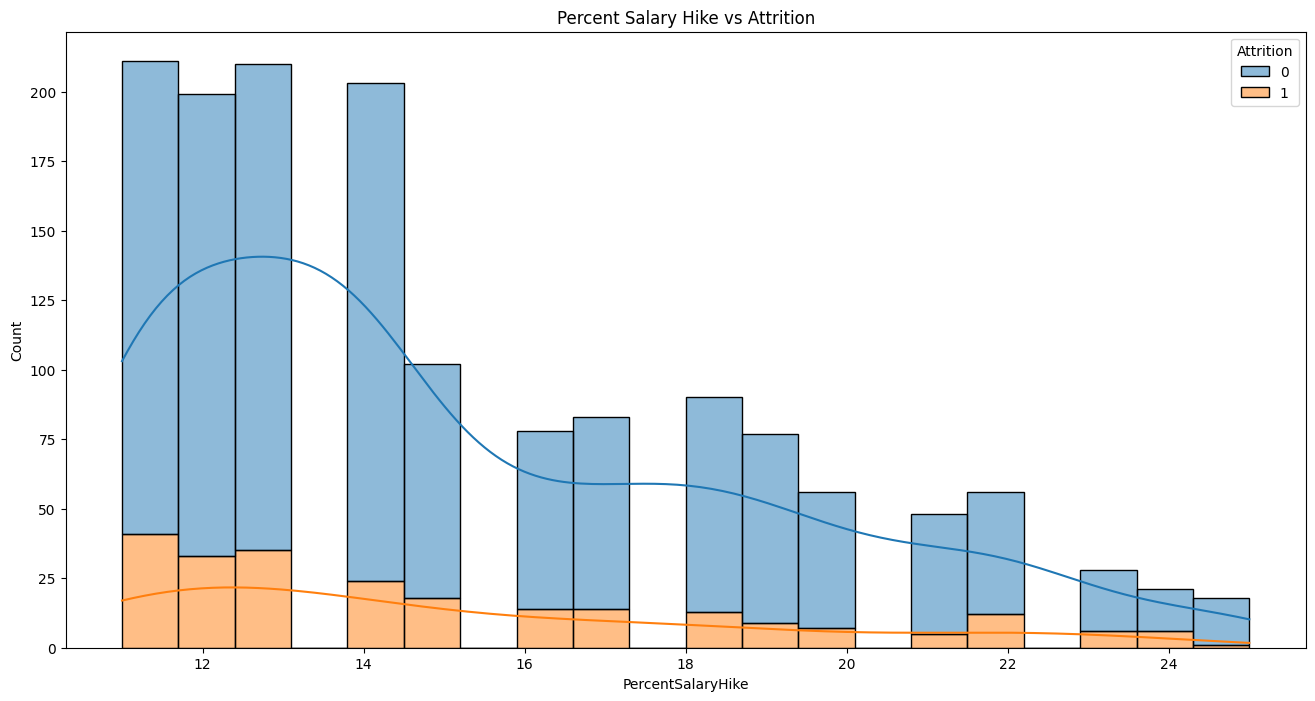

In [150]:
# plot for PercentSalaryHike with Attrition
sns.histplot(df, x='PercentSalaryHike', hue='Attrition', kde=True, bins=20, multiple='stack', hue_order=[0, 1])
plt.title('Percent Salary Hike vs Attrition')
plt.show()

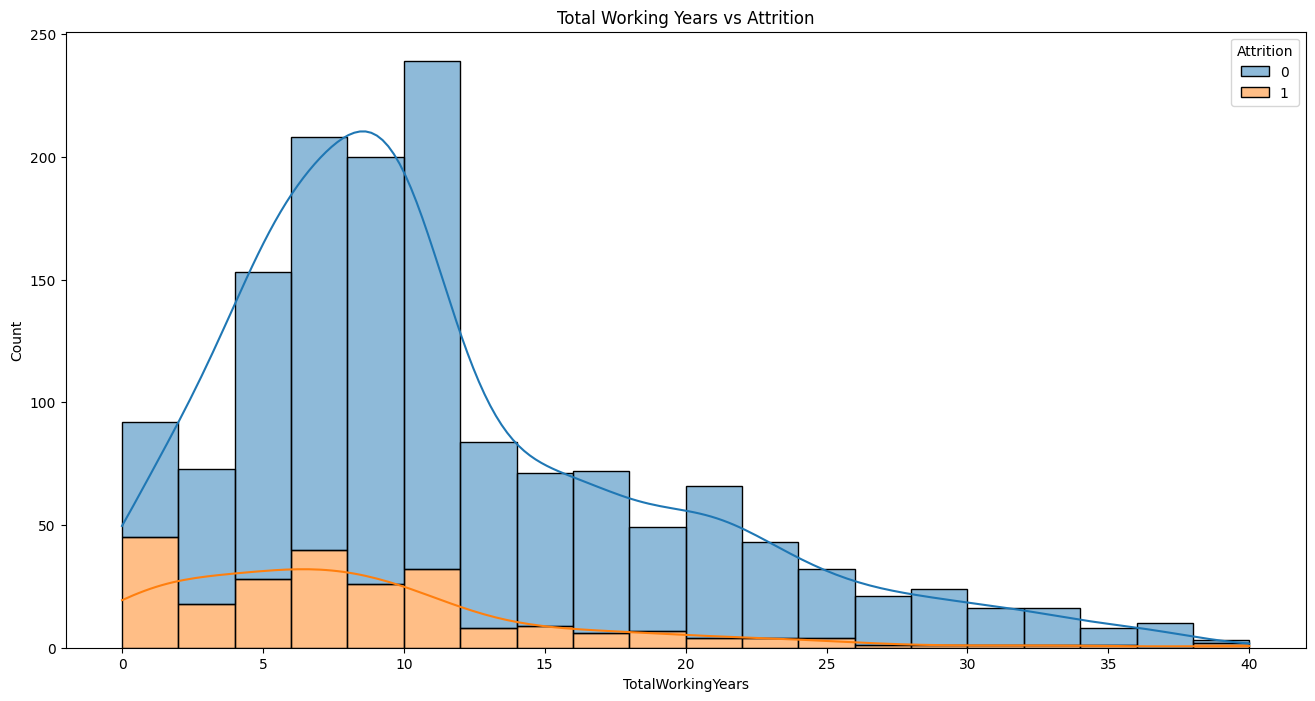

In [151]:
# plot for TotalWorkingYears with Attrition
sns.histplot(df, x='TotalWorkingYears', hue='Attrition', kde=True, bins=20, multiple='stack', hue_order=[0, 1])
plt.title('Total Working Years vs Attrition')
plt.show()

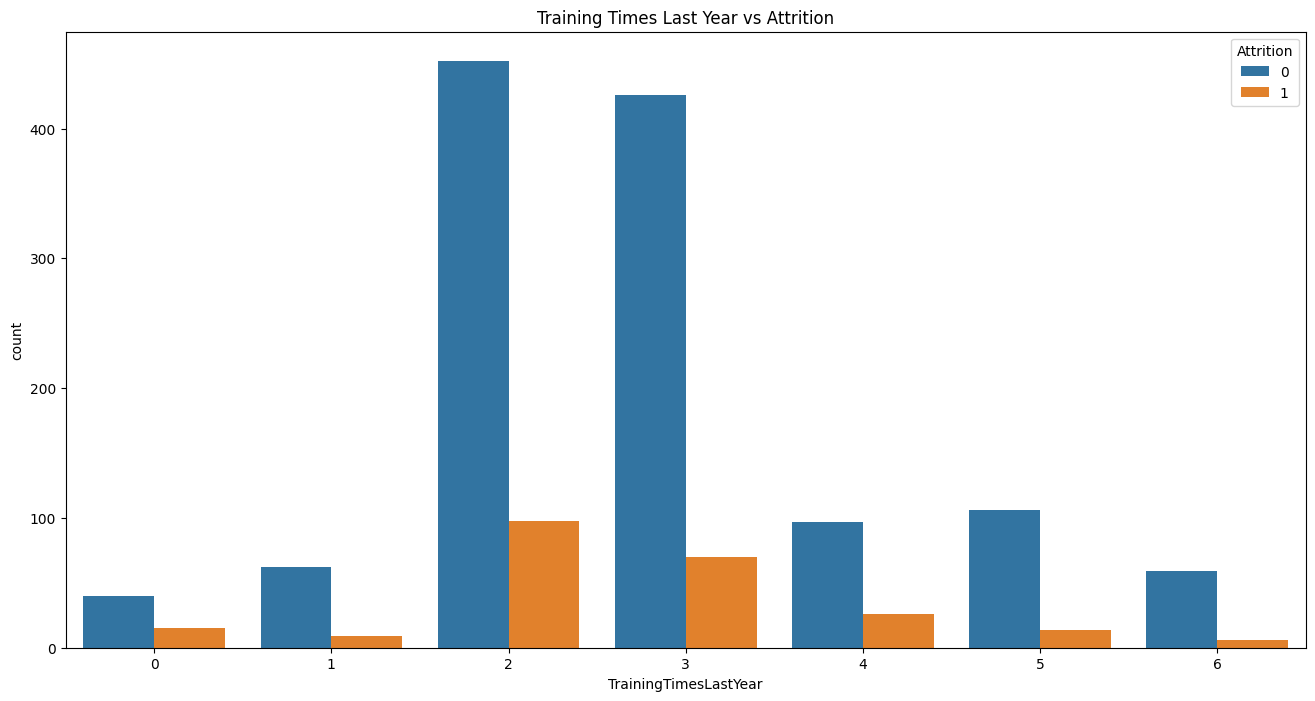

In [152]:
# plot for TrainingTimesLastYear with Attrition
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Training Times Last Year vs Attrition')
plt.show()

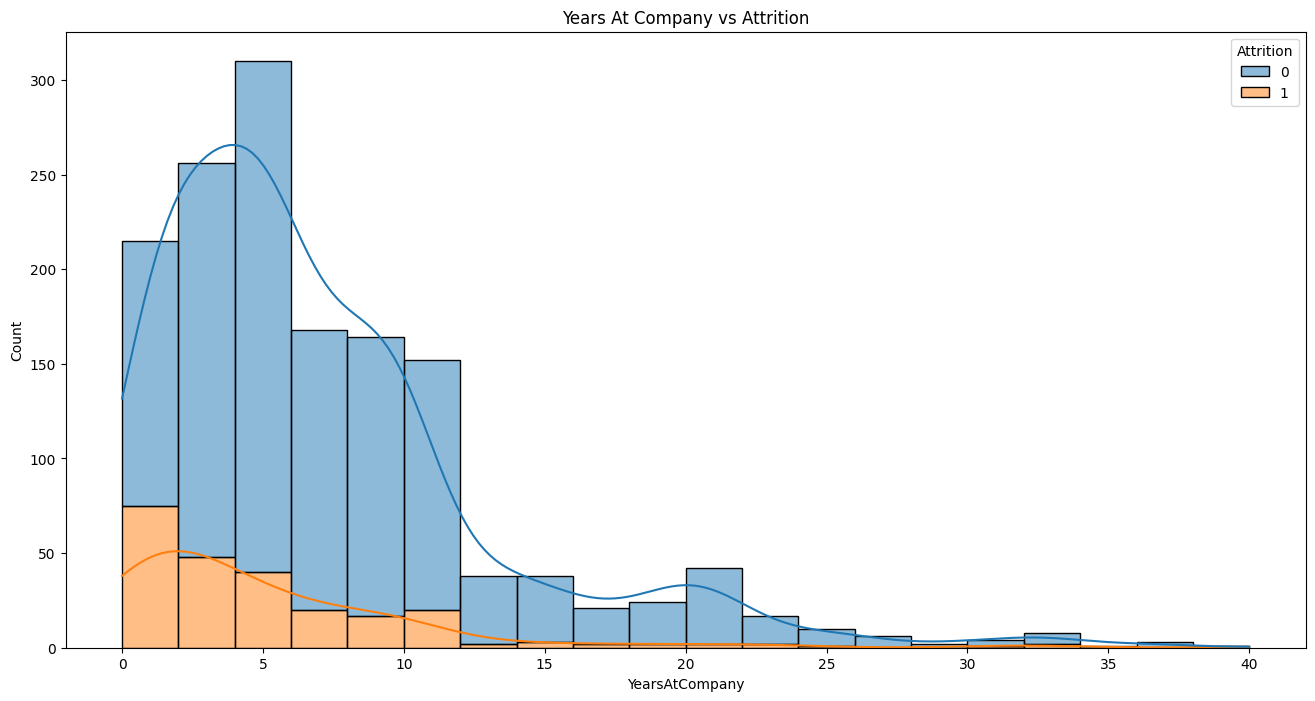

In [153]:
# plot for YearsAtCompany with Attrition
sns.histplot(df, x='YearsAtCompany', hue='Attrition', kde=True, bins=20, multiple='stack', hue_order=[0, 1])
plt.title('Years At Company vs Attrition')
plt.show()

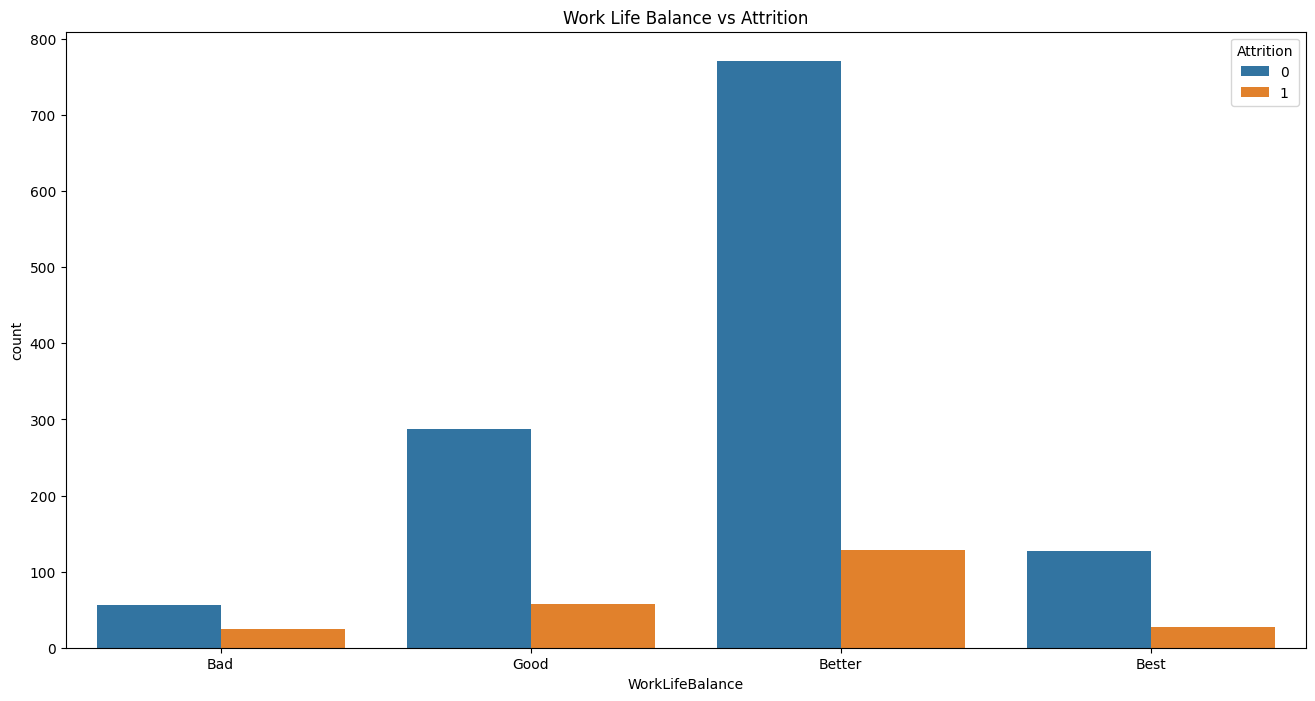

In [154]:
# plot for WorkLifeBalance with Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', hue_order=[0, 1], data=df)
plt.title('Work Life Balance vs Attrition')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Bad', 'Good', 'Better', 'Best'])
plt.show()

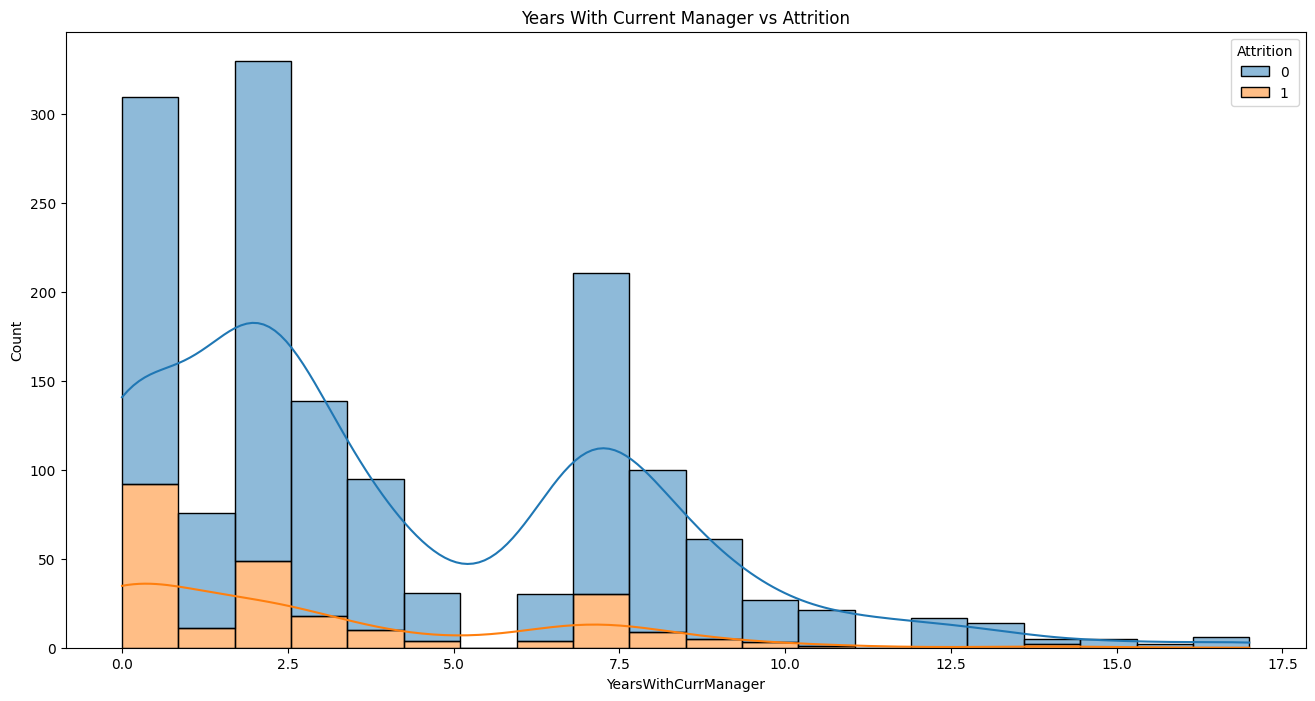

In [155]:
# plot for YearsWithCurrManager with Attrition
sns.histplot(df, x='YearsWithCurrManager', hue='Attrition', kde=True, bins=20, multiple='stack', hue_order=[0, 1])
plt.title('Years With Current Manager vs Attrition')
plt.show()

building the model

In [156]:
# convert categorical data to numerical
df = pd.get_dummies(df, drop_first=True)

In [157]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [158]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# Define the model
model = RandomForestRegressor()

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance again
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Mean Absolute Error: 0.23
Mean Squared Error: 0.11
R-squared: 0.18
